In [33]:
import numpy as np
import pandas as pd
from astroquery.jplhorizons import Horizons
from astropy.time import Time
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import time
from astropy.coordinates import GeocentricMeanEcliptic
from astropy.coordinates import HeliocentricMeanEcliptic
from astropy.coordinates import HeliocentricTrueEcliptic
from astropy.coordinates import GeocentricTrueEcliptic
from astropy.coordinates import BarycentricTrueEcliptic
from astropy.coordinates import BarycentricMeanEcliptic


def convert_to_primary_centric(paramsDF,objectName):
     #Current column names are just descriptive, not representative of final product column names
    updatedDF = pd.DataFrame(columns = ['Primary-Centric Time','Delta_lon','Delta_lat'])
    
    #Convert the dates into a Julian date format
    date = paramsDF['Dates']
    dateList = []
    for i in date:
        jd = Time(i,format='jd')
        dateList.append(jd)
        
    #Get the Horizons data for the object at the times it was observed
    primary = Horizons(id=objectName,location=None,epochs=dateList)
    
    updatedDF['Primary-Centric Time'] = paramsDF['Dates']-primary.vectors()['lighttime']
    
    RA1 = np.array(paramsDF['RA-Primary'])
    DEC1 = np.array(paramsDF['DEC-Primary'])
    deltaRA = np.array(paramsDF['Delta-RA'])
    deltaDEC = np.array(paramsDF['Delta-DEC'])
    deltaLat = np.array(paramsDF['Delta_lat'])
    deltaLon = np.array(paramsDF['Delta_lon'])
    
    #Convert the deltas back to degrees from arcseconds
    RA2 = RA1+deltaRA/3600/np.cos(DEC1)
    DEC2 = DEC1 + deltaDEC/3600
    
    #Essentially we define where the object is in our RA/DEC coordinate system. ICRS is the system our coordinates are in.
    dist = primary.vectors()['range']
    moonC = SkyCoord(ra=RA2*u.degree, dec=DEC2*u.degree, frame='icrs',distance = dist)
    primC = SkyCoord(ra=RA1*u.degree, dec=DEC1*u.degree, frame='icrs',distance = dist)
    
    moonEcl = moonC.transform_to(GeocentricMeanEcliptic(equinox='J2000'))
    primEcl = primC.transform_to(GeocentricMeanEcliptic(equinox='J2000'))
    
    Lat1 = primEcl.lat.degree
    Lon1 = primEcl.lon.degree
    
    Lat2 = moonEcl.lat.degree
    Lon2 = moonEcl.lon.degree
    
    Lat3 = (Lat1 + deltaLat/3600)
    Lon3 = (Lon1+deltaLon/3600/np.cos(Lat1))
    
    newDeltaLat = Lat2-Lat1
    newDeltaLon = (Lon2-Lon1)*np.cos(Lat1)
    
    words = ['MakeMake','Calc_Moon','UnCalc_Moon']
    array1 = np.array([[Lon1[0]*3600,Lat1[0]*3600],[Lon2[0]*3600,Lat2[0]*3600],[Lon3[0]*3600,Lat3[0]*3600]]) 
    array2 = np.array([[Lon1[1]*3600,Lat1[1]*3600],[Lon2[1]*3600,Lat2[1]*3600],[Lon3[1]*3600,Lat3[1]*3600]]) 
    array3 = np.array([[Lon1[2]*3600,Lat1[2]*3600],[Lon2[2]*3600,Lat2[2]*3600],[Lon3[2]*3600,Lat3[2]*3600]]) 
    array4 = np.array([[Lon1[3]*3600,Lat1[3]*3600],[Lon2[3]*3600,Lat2[3]*3600],[Lon3[3]*3600,Lat3[3]*3600]]) 
    array5 = np.array([[Lon1[4]*3600,Lat1[4]*3600],[Lon2[4]*3600,Lat2[4]*3600],[Lon3[4]*3600,Lat3[4]*3600]]) 
    print(array1)
    
    dictionary = {'MakeMake':0,'Calc_Moon':1,'UnCalc_Moon':2}
    plot_scatter(array1,dictionary,words)
    plot_scatter(array2,dictionary,words)
    plot_scatter(array3,dictionary,words)
    plot_scatter(array4,dictionary,words)
    plot_scatter(array5,dictionary,words)
    

[[652369.68352594 104560.5426322 ]
 [652369.75807962 104561.19548618]
 [652369.87301257 104561.0986322 ]]


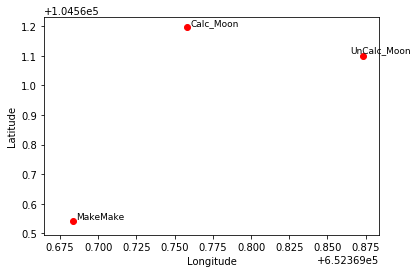

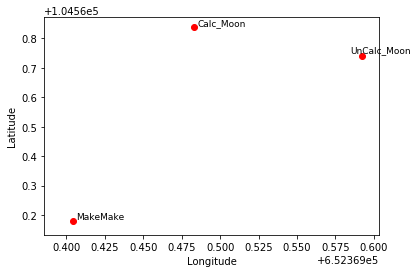

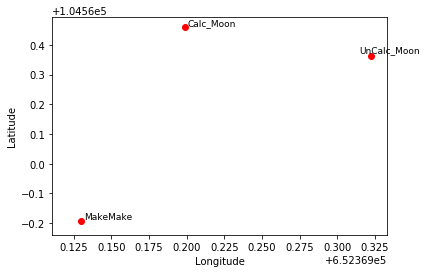

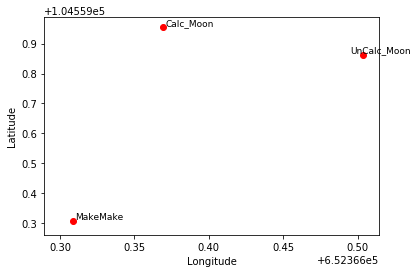

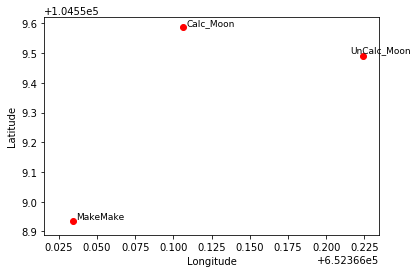

In [44]:
paramsDF = pd.read_csv('GrundyData1.csv')

convert_to_primary_centric(paramsDF,'MakeMake')

In [43]:
def plot_scatter(array,dictionary, words):
    for i in words:
            x, y = array[dictionary[i]]
            plt.scatter(x, y, color = 'red')
            if dictionary[i]==2:
                plt.text(x-0.008,y+0.012,i,fontsize=9)
            else:
                plt.text(x+0.002,y+0.006,i,fontsize=9)
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')
    plt.show()